Import all the necessery library need for preprocessing and plotting the data. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Import Sequential model from Keras to create dense layers. 

In [1]:
import random
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import keras 
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Load the dataset from CSV file which is generate by process shown Methodology Process. 

In [5]:
d = pd.read_csv('final_dataset.csv')
X = d[d.columns[0:3]].values
y = d[d.columns[3]]
print(y.shape)

(56,)


Normalization Process for X(Independent Variable) and Y(Dependent Variable).

In [0]:
X=X/1000
y=y/10

Divide dataset in training and testing subsets.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Load Sequential model with 1st dense layer of 10 neurons. Second with 5 neurons and Third layer with 1 neuron. In Dense layers we used 'relu' optimizer and loss function is 'adam'. Summary of the Model is printed at the end.

In [9]:
model = Sequential()
model.add(Dense(10, activation='relu',input_dim = 3))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
None


Here we fit our data in the model with batch size of 100 and run it on 1000 epochs. Plot the loss with every epochs.




Train on 44 samples, validate on 12 samples
Epoch 1/1000





44/44 [==============================] - 1s 19ms/step - loss: 0.1550 - val_loss: 0.1738
Epoch 2/1000
44/44 [==============================] - 0s 184us/step - loss: 0.1513 - val_loss: 0.1696
Epoch 3/1000
44/44 [==============================] - 0s 181us/step - loss: 0.1471 - val_loss: 0.1652
Epoch 4/1000
44/44 [==============================] - 0s 150us/step - loss: 0.1427 - val_loss: 0.1607
Epoch 5/1000
44/44 [==============================] - 0s 80us/step - loss: 0.1384 - val_loss: 0.1563
Epoch 6/1000
44/44 [==============================] - 0s 82us/step - loss: 0.1340 - val_loss: 0.1518
Epoch 7/1000
44/44 [==============================] - 0s 83us/step - loss: 0.1297 - val_loss: 0.1475
Epoch 8/1000
44/44 [==============================] - 0s 70us/step - loss: 0.1255 - val_loss: 0.1432
Epoch 9/1000
44/44 [==============================] - 0s 120us/step - loss: 0.1214 - val_loss: 0.1391
Epoch 10/1000
44/44 [==============

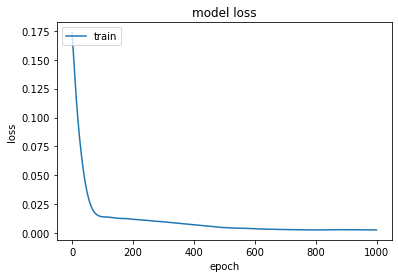

In [10]:
history = model.fit(X_train, y_train,batch_size=100,epochs=1000,verbose=1,validation_data=(X_test, y_test))
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

Save the Model file.

In [0]:
model.save('model.h5')

Predict the test set using generated model. 

In [0]:
result=model.predict(X_test)

In [13]:
X_test

array([[0.401, 0.231, 0.241],
       [0.68 , 0.52 , 0.131],
       [0.7  , 0.491, 0.101],
       [0.481, 0.181, 0.191],
       [0.77 , 0.81 , 0.181],
       [0.161, 0.131, 0.171],
       [0.62 , 0.471, 0.311],
       [0.151, 0.461, 0.121],
       [0.501, 0.371, 0.131],
       [0.63 , 0.391, 0.181],
       [0.311, 0.221, 0.291],
       [0.401, 0.311, 0.341]])

Plot the predicted data(in red colour) with real output(in green colour).

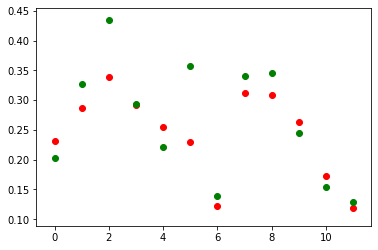

In [14]:
plt.scatter(range(12),result,c='r')
plt.scatter(range(12),y_test,c='g')
plt.show()